In [59]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12,4)

#CB_color_cycle = ['#8ecae6', '#1D5D9B', '#023047',
#                  '#ffb703', '#fb8500', '#6F61C0']
CB_color_cycle = ['#0073BD', '#F6EDD9', '#71AB48', '#D0DCAA',  
                  '#fb9a99', '#e31a1c',
                  '#fdbf6f', '#ff7f00',
                  '#cab2d6', '#6a3d9a', '#b15928', '#D2987B',
                  '#FFE8D2', '#BCA79D', '#005B46', '#C4FCF0', '#4C8077', '#9DB09C']
sns.set_palette(sns.color_palette(CB_color_cycle, 11))

In [3]:
combined = pd.read_excel("combined_notExtend.xlsx" , sheet_name=None)
sheets = list(combined.keys())
combined_summay = pd.DataFrame()
for name in sheets:
    df2 = pd.DataFrame([[combined[name]['mismatch'].sum()/combined[name].shape[0]*100, 
                         combined[name]['indel'].sum()/combined[name].shape[0]*100, 
                         combined[name]['long_mismatch'].sum()/combined[name].shape[0]*100, 
                         combined[name]['normal'].sum()/combined[name].shape[0]*100]], index=[name])
    combined_summay = pd.concat([combined_summay ,df2])
combined_summay = combined_summay.reset_index()
combined_summay.columns = ['Species', 'Mismatch', 'Indel', 'long_mismatch', 'Normal']

combined_summay

,Species,Mismatch,Indel,long_mismatch,Normal
0,Greenland_wolf,21.686747,6.827309,3.212851,74.297189
1,Red_deer,0.877193,0.000000,0.877193,98.245614
2,Philippine_flying_lemur,32.653061,9.523810,4.081633,63.945578
3,Asiatic_elephant,0.416667,0.000000,0.416667,99.166667
4,Tammar_wallaby,0.000000,0.000000,0.000000,100.000000
5,Gray_short_tailed_opossum,0.000000,0.000000,0.000000,100.000000
6,Clouded_leopard,0.625000,0.625000,1.875000,96.875000


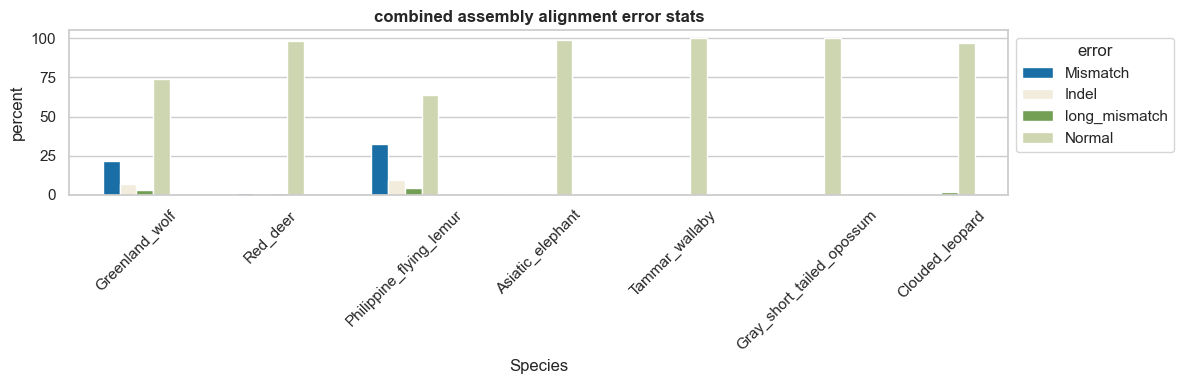

In [4]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=combined_summay.melt(id_vars='Species',
                                  value_name='percent', var_name='error'),
            x='Species', y='percent', hue='error', palette=CB_color_cycle, width=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('combined assembly alignment error stats', weight='bold')
plt.tight_layout()

plt.savefig("combined.svg", format="svg")

In [18]:
sheets = list(combined.keys())
combined_mis_counts = pd.DataFrame()
for name in sheets:
    temp = pd.DataFrame(combined[name]["count_mismatch"])
    temp['Species']=name
    temp.columns = ['# of mismatch loci', 'Species']
    combined_mis_counts = pd.concat([combined_mis_counts ,temp])

combined_indel_counts = pd.DataFrame()
for name in sheets:
    temp = pd.DataFrame(combined[name]["count_indel"])
    temp['Species']=name
    temp.columns = ['# of indel loci', 'Species']
    combined_indel_counts = pd.concat([combined_indel_counts ,temp])

combined_coverage = {}
for name in sheets:
    temp = list(combined[name]["coverage"])
    combined_coverage[name] = temp

combined_pattern_counts = pd.DataFrame()
for name in sheets:
    temp = pd.DataFrame(combined[name]["count_pattern"])
    temp['Species']=name
    temp.columns = ['# of patterns', 'Species']
    combined_pattern_counts = pd.concat([combined_pattern_counts ,temp])

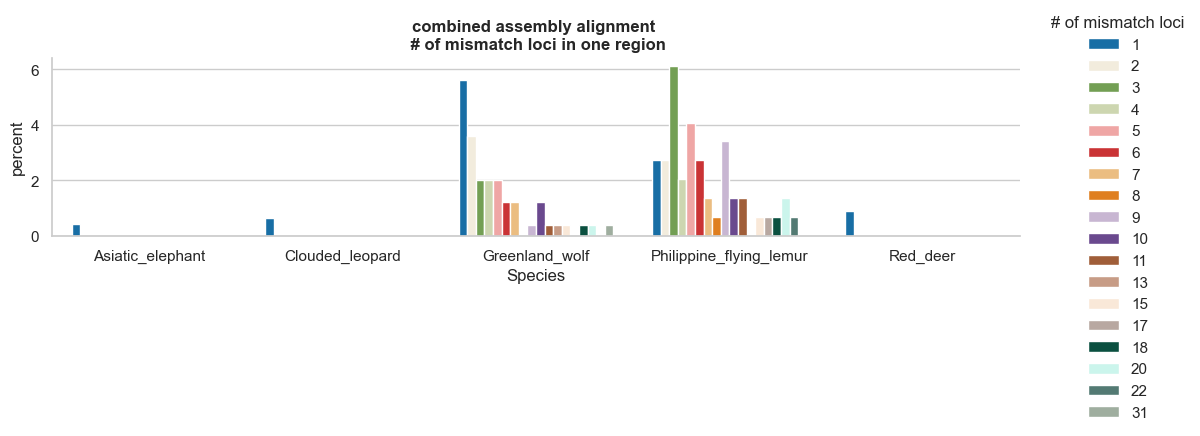

In [60]:
sns.set_theme(style="whitegrid")
x,y = 'Species', '# of mismatch loci'
combined_mis_counts_format = combined_mis_counts.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
combined_mis_counts_format = combined_mis_counts_format[combined_mis_counts_format["# of mismatch loci"] != 0]
ax = combined_mis_counts_format.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height=3, aspect=15/5, palette=CB_color_cycle)
plt.title('combined assembly alignment \n # of mismatch loci in one region', weight='bold')
plt.tight_layout()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("combined_mismatch.svg", format="svg", bbox_inches = "tight")

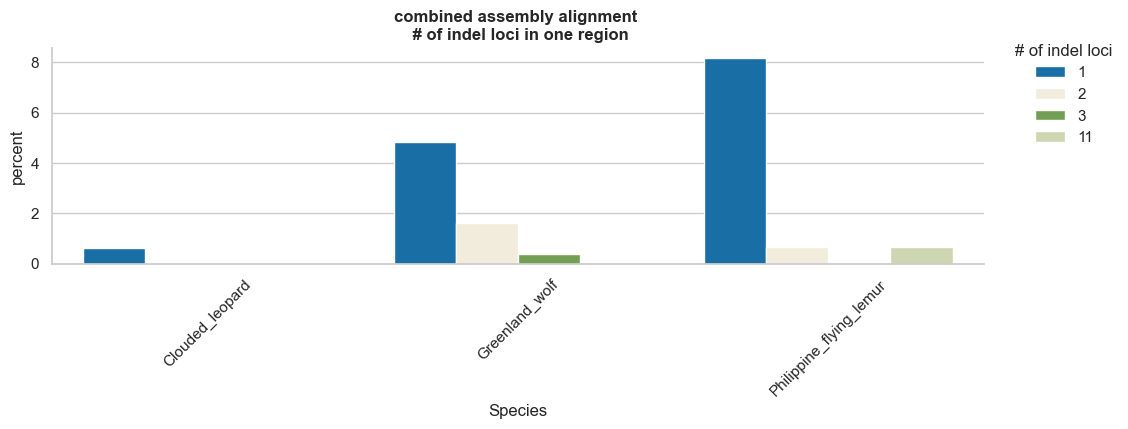

In [7]:
sns.set_theme(style="whitegrid")
x,y = 'Species', '# of indel loci'
combined_indel_counts_format = combined_indel_counts.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
combined_indel_counts_format = combined_indel_counts_format[combined_indel_counts_format["# of indel loci"] != 0]
ax = combined_indel_counts_format.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height=3, aspect=15/5, palette=CB_color_cycle)
plt.tight_layout()
plt.xticks(rotation=45)
plt.title('combined assembly alignment \n # of indel loci in one region', weight='bold')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("combined_indel.svg", format="svg", bbox_inches = "tight")

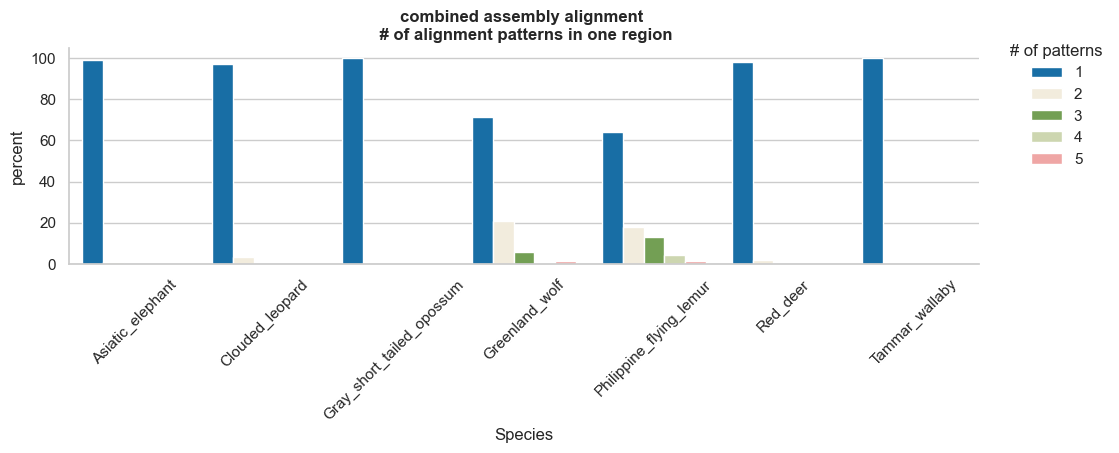

In [8]:
sns.set_theme(style="whitegrid")

x,y = 'Species', '# of patterns'
ax=(combined_pattern_counts
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height=3, aspect=15/5, palette=CB_color_cycle))
plt.tight_layout()
plt.title('combined assembly alignment \n # of alignment patterns in one region', weight='bold')
plt.xticks(rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("combined_pattern.svg", format="svg", bbox_inches = "tight")

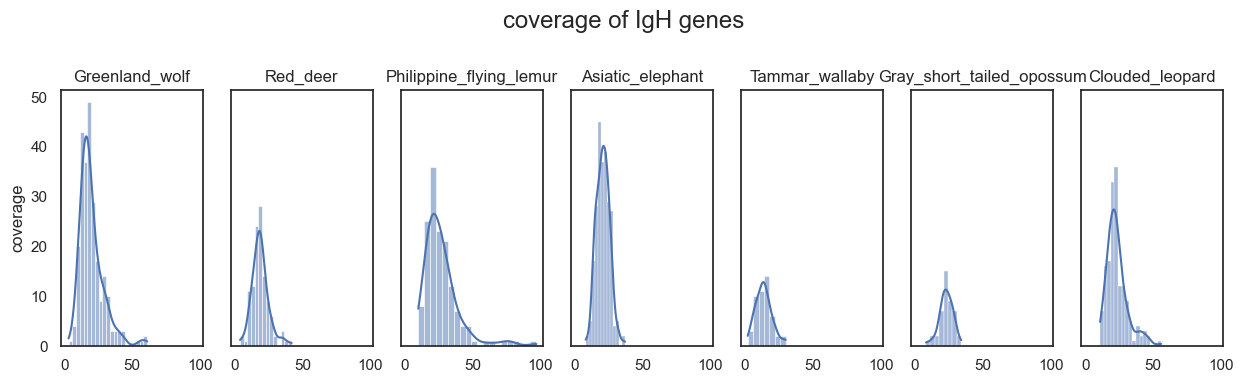

In [56]:
sns.set_theme(style="white")
plt.rcParams['figure.figsize'] = (15,4)

first_key = list(combined_coverage.keys())

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, sharey=True, sharex=True)
sns.histplot(combined_coverage[first_key[0]], ax=ax1, kde=True)
sns.histplot(combined_coverage[first_key[1]], ax=ax2, kde=True)
sns.histplot(combined_coverage[first_key[2]], ax=ax3, kde=True)
sns.histplot(combined_coverage[first_key[3]], ax=ax4, kde=True)
sns.histplot(combined_coverage[first_key[4]], ax=ax5, kde=True)
sns.histplot(combined_coverage[first_key[5]], ax=ax6, kde=True)
sns.histplot(combined_coverage[first_key[6]], ax=ax7, kde=True)

ax1.title.set_text(first_key[0])
ax2.title.set_text(first_key[1])
ax3.title.set_text(first_key[2])
ax4.title.set_text(first_key[3])
ax5.title.set_text(first_key[4])
ax6.title.set_text(first_key[5])
ax7.title.set_text(first_key[6])
ax1.set_ylabel('coverage')
st = fig.suptitle("coverage of IgH genes", fontsize="x-large")
st.set_y(0.95)
fig.subplots_adjust(top=0.75)


---

In [2]:
primary = pd.read_excel("primary_results/primary_notExtend.xlsx" , sheet_name=None)
sheets = list(primary.keys())
primary_summay = pd.DataFrame()
for name in sheets:
    df2 = pd.DataFrame([[primary[name]['mismatch'].sum()/(primary[name].shape[0])*100, 
                         primary[name]['indel'].sum()/(primary[name].shape[0])*100, 
                         primary[name]['low_quality'].sum()/(primary[name].shape[0])*100, 
                         primary[name]['normal'].sum()/(primary[name].shape[0])*100]], index=[name])
    primary_summay = pd.concat([primary_summay ,df2])
primary_summay = primary_summay.reset_index()
primary_summay.columns = ['Species', 'Mismatch', 'Indel', 'Low_quality', 'Normal']
primary_summay

,Species,Mismatch,Indel,Low_quality,Normal
0,Greenland_wolf,44.871795,42.948718,36.538462,12.820513
1,Red_deer,4.838710,17.741935,56.451613,35.483871
2,Philippine_flying_lemur,23.076923,35.897436,68.376068,5.128205
3,Asiatic_elephant,54.054054,17.117117,4.504505,36.036036
4,Tammar_wallaby,0.000000,0.000000,3.703704,96.296296
5,Gray_short_tailed_opossum,88.888889,44.444444,0.000000,5.555556
6,Clouded_leopard,0.000000,18.390805,42.528736,54.022989


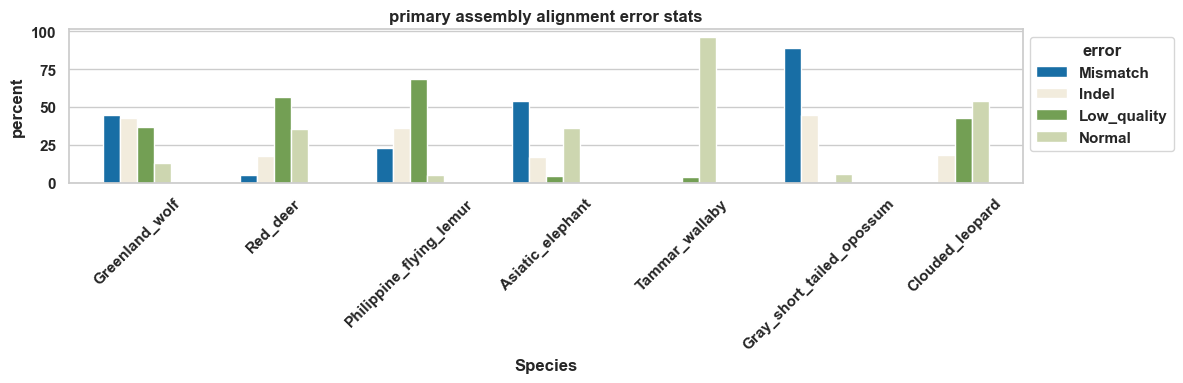

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

ax = sns.barplot(data=primary_summay.melt(id_vars='Species',
                                  value_name='percent', var_name='error'),
            x='Species', y='percent', hue='error', palette=CB_color_cycle, width=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('primary assembly alignment error stats', weight='bold')
plt.tight_layout()

plt.savefig("primary.svg", format="svg")


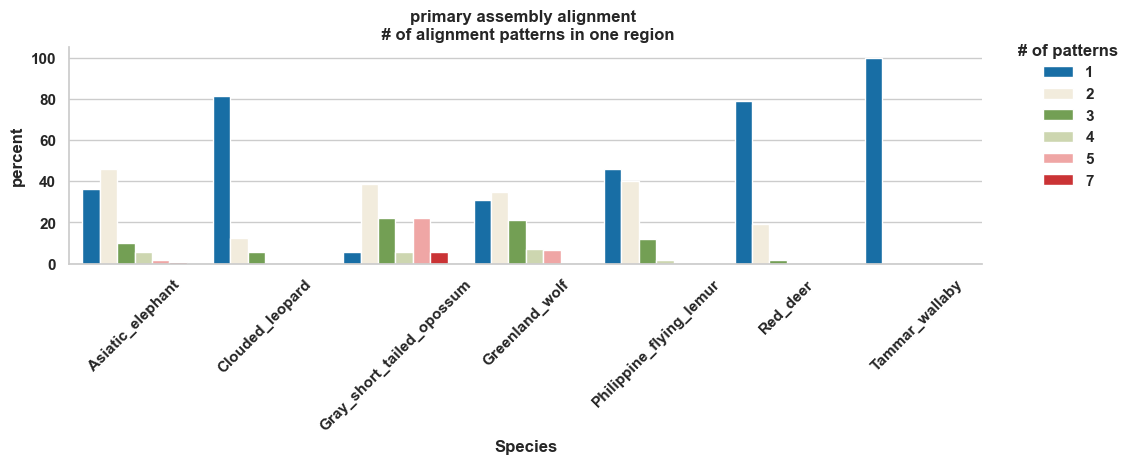

In [15]:
primary_pattern_counts = pd.DataFrame()
for name in sheets:
    temp = pd.DataFrame(primary[name]["count_pattern"])
    temp['Species']=name
    temp.columns = ['# of patterns', 'Species']
    primary_pattern_counts = pd.concat([primary_pattern_counts ,temp])

sns.set_theme(style="whitegrid")

x,y = 'Species', '# of patterns'
ax=(primary_pattern_counts
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height=3, aspect=15/5, palette=CB_color_cycle))
plt.tight_layout()
plt.xticks(rotation=45)
plt.title('primary assembly alignment \n # of alignment patterns in one region', weight='bold')


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("primary_pattern.svg", format="svg", bbox_inches = "tight")

In [6]:
delta = pd.concat([primary_summay.melt(id_vars='Species', value_name='percent', var_name='error'),
           combined_summay.melt(id_vars='Species', value_name='percent', var_name='error')], axis=1)
delta['delta'] = delta.iloc[:, 5] - delta.iloc[:, 2]
delta.columns = ["Species", "error", "pri_percent", "index",  "error1", "comb_precent", "delta"]


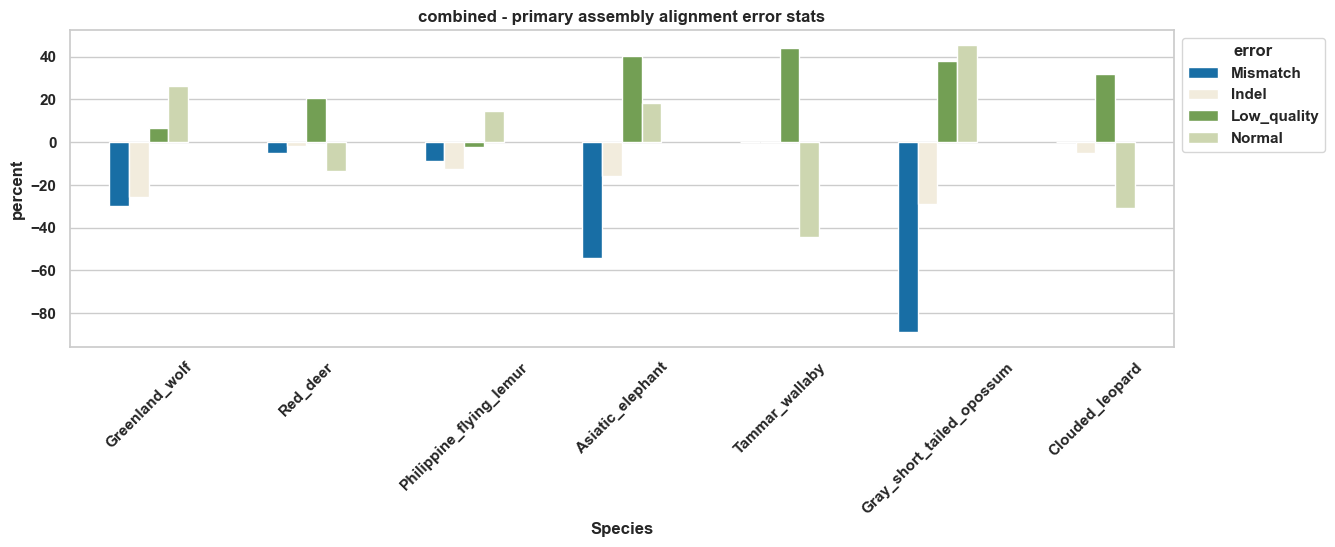

In [7]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(delta, x='Species', y='delta', hue='error', palette=CB_color_cycle, width=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('combined - primary assembly alignment error stats', weight='bold')
ax.set_ylabel('percent')
plt.savefig("delta.svg", format="svg", bbox_inches = "tight")